In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from distgen.physical_constants import unit_registry, hc, MC2

In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
from distgen.dist import DowellSchmergeMomentumDist

In [5]:
photon_energy = 2.5*unit_registry('eV')

laser_wavelength = hc/photon_energy 

cathode_temperature = 300 * unit_registry('K')
fermi_energy = 6 * unit_registry('eV')
cathode_work_function = 2 * unit_registry('eV')

dscm = DowellSchmergeMomentumDist(laser_wavelength, cathode_work_function, cathode_temperature, fermi_energy, verbose=True)

Dowell-Schermge Cathode Model
      laser wavelength = 495.937 nm, photon energy = 2.5 eV
      cathode temperature = 300 K, cathode work function = 2 eV, Fermi energy = 6 eV


In [6]:
#dscm.p_bounds, dscm.polar_angle_bounds

In [7]:
#dscm.p_pts(100).to('eV/c')

In [8]:

#P[0,0].to('eV/c'), PHI[0,0]

In [9]:
P, PHI = dscm.p_by_polar_angle_meshgrid(400, 200)

rho = dscm.rho_p_polar_angle(P, PHI)

#print(PHI[:,-1])

#print(PHI.shape, P.shape, rho.shape)

/usr/share/miniconda/envs/distgen-dev/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5707: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  C = np.asanyarray(args[2])


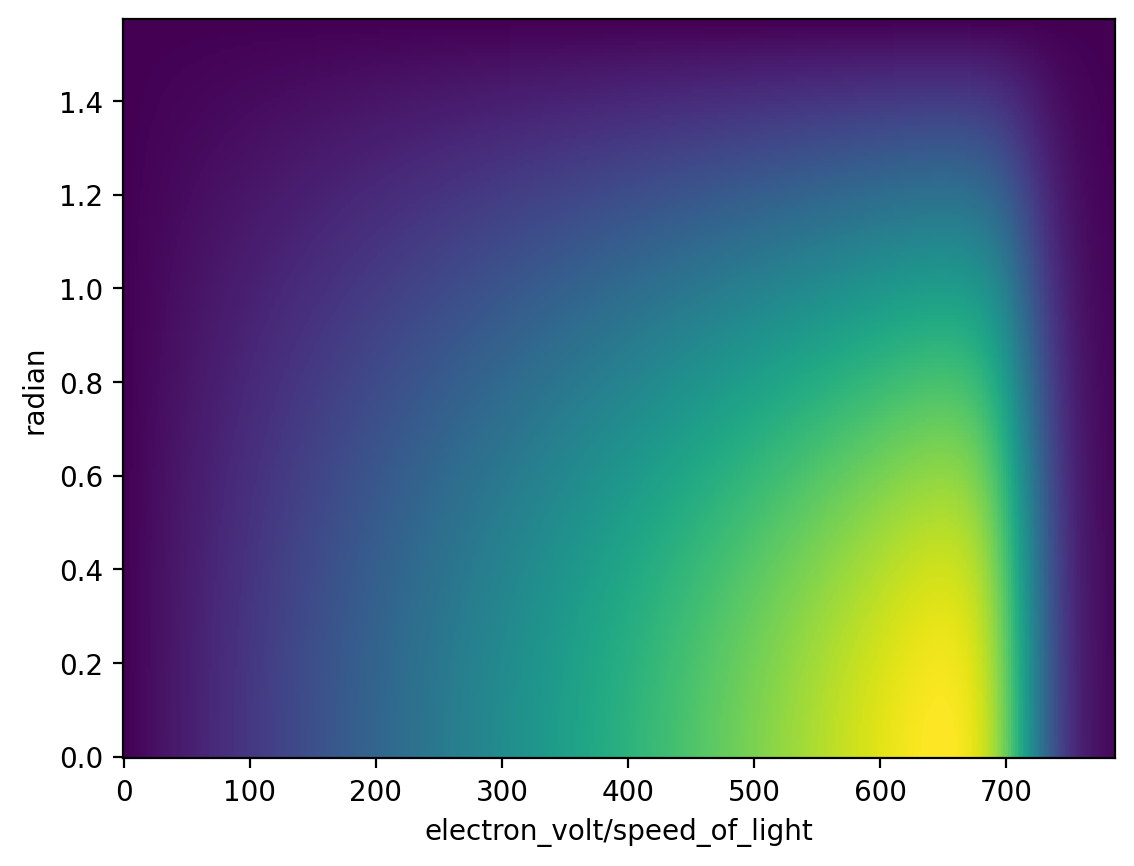

In [10]:
plt.pcolormesh(P, PHI, rho);

In [11]:
from distgen.dist import random_generator

In [12]:
n_sample = 1_000_000
rns = random_generator( (3, n_sample), 'hammersley')

In [13]:
print(rns.shape)

(3, 1000000)


In [14]:
ps, phis = dscm.cdfinv(rns[0,:], rns[1,:])
thetas = np.linspace(0, 2*np.pi, len(ps))*unit_registry('rad')

In [15]:
#plt.scatter(phis*(180/np.pi), ps)
#plt.xlabel('$\\theta$ (deg)');
#plt.ylabel('$p_z$ (eV/c)');

#hist, xes, yes = np.histogram2d(phis.magnitude*(180/np.pi), ps.magnitude, bins=100)
#xcs = (xes[:-1] + xes[1:]) / 2
#ycs = (yes[:-1] + yes[1:]) / 2

#plt.imshow(hist.transpose(), origin='lower', extent=(xcs[0], xcs[-1], ycs[0], ycs[-1]), aspect='auto')
#plt.xlabel('$\\theta$ (rad)');
#plt.ylabel('$|p|$ (eV/c)');

In [16]:
px = ps*np.cos(thetas)*np.sin(phis)
py = ps*np.sin(thetas)*np.sin(phis)
pz = ps*np.cos(phis)

In [17]:
#plt.scatter(px, pz)
#plt.xlabel('$p_x$ (eV/c)');
#plt.ylabel('$p_z$ (eV/c)');

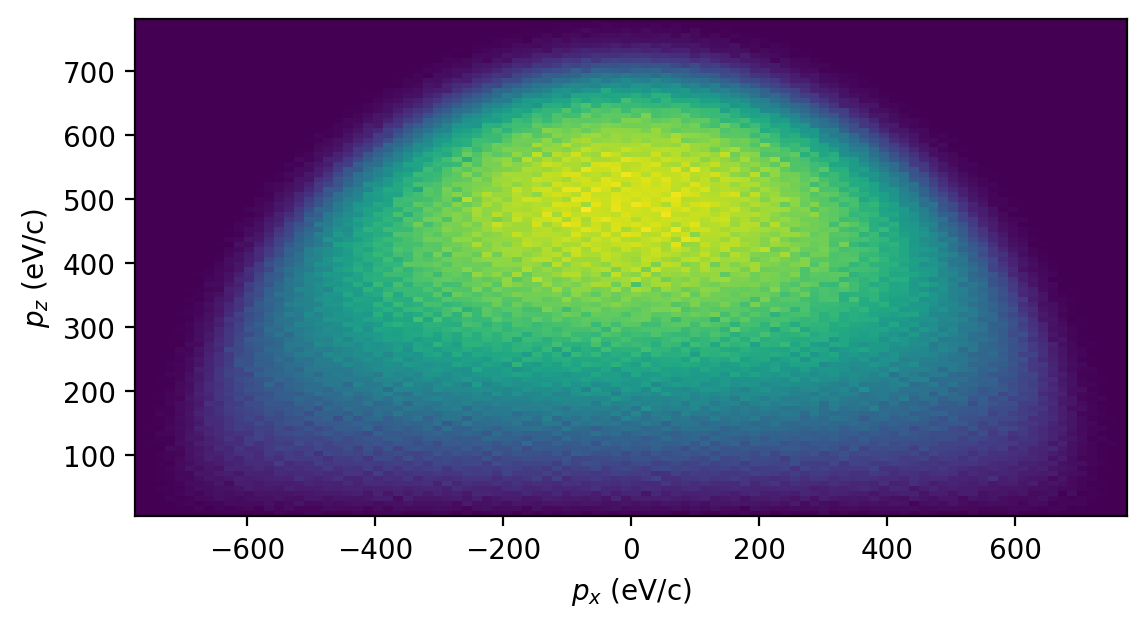

In [18]:
hist, xes, yes = np.histogram2d(px.magnitude, pz.magnitude, bins=100)
xcs = (xes[:-1] + xes[1:]) / 2
ycs = (yes[:-1] + yes[1:]) / 2

plt.imshow(hist.transpose(), origin='lower', extent=(xcs[0], xcs[-1], ycs[0], ycs[-1]))
plt.xlabel('$p_x$ (eV/c)');
plt.ylabel('$p_z$ (eV/c)');

In [19]:
np.mean(px**2)/MC2

0.16986022309479243 <Unit('electron_volt / speed_of_light ** 2')>